<a href="https://colab.research.google.com/github/Phaneesh-Katti/Fruits-n-Veggies-Classifier/blob/main/Final_Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle



In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=0b8b6b1b770e0e6108648140ac07d1815e2403089d1e46f458812b07482e269c
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"insatanic","key":"84e54b88ddc3f0018d67d54129b53b61"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d moltean/fruits

 98% 744M/760M [00:07<00:00, 112MB/s]
100% 760M/760M [00:07<00:00, 103MB/s]


In [ ]:
!unzip fruits.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: dataset/fruits-360/Training/Tomato 3/126

# Making Datasets

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/dataset/fruits-360/Training"
testing_path = "/content/dataset/fruits-360/Test"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (100,100),
    batch_size = 32
)

Found 67692 files belonging to 131 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_path,
    image_size = (100,100),
    batch_size = 32
)

Found 22688 files belonging to 131 classes.


# Augmenting Data

In [ ]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (100,100),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 67692 images belonging to 131 classes.


In [ ]:
test_dataset_aug = dataGen.flow_from_directory(
    testing_path,
    target_size = (100,100),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 22688 images belonging to 131 classes.


# Model


In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(input_shape=(100,100,3),
                                               include_top=False,
                                               weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
pretrained_model.trainable = False

In [ ]:
def create_model():
  TLmodel_aug = tf.keras.models.Sequential()

  TLmodel_aug.add(pretrained_model)

  TLmodel_aug.add(tf.keras.layers.GlobalAveragePooling2D())

  TLmodel_aug.add(tf.keras.layers.Dense(1024, activation='relu'))
  TLmodel_aug.add(tf.keras.layers.Dense(512, activation='relu'))
  TLmodel_aug.add(tf.keras.layers.Dense(131, activation='softmax'))

  TLmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])
  return TLmodel_aug

TLmodel_aug = create_model()

In [ ]:
history4 = TLmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 30)

Epoch 1/30
2116/2116 [==============================] - 286s 118ms/step - loss: 1.1974 - accuracy: 0.6998 - val_loss: 0.7967 - val_accuracy: 0.7952
Epoch 2/30
2116/2116 [==============================] - 246s 116ms/step - loss: 0.2410 - accuracy: 0.9253 - val_loss: 0.7774 - val_accuracy: 0.8356
Epoch 3/30
2116/2116 [==============================] - 245s 116ms/step - loss: 0.1750 - accuracy: 0.9473 - val_loss: 0.7979 - val_accuracy: 0.8357
Epoch 4/30
2116/2116 [==============================] - 245s 116ms/step - loss: 0.1462 - accuracy: 0.9546 - val_loss: 0.7082 - val_accuracy: 0.8586
Epoch 5/30
2116/2116 [==============================] - 247s 117ms/step - loss: 0.1207 - accuracy: 0.9662 - val_loss: 0.9336 - val_accuracy: 0.8432
Epoch 6/30
2116/2116 [==============================] - 247s 117ms/step - loss: 0.1286 - accuracy: 0.9653 - val_loss: 0.8088 - val_accuracy: 0.8592
Epoch 7/30
2116/2116 [==============================] - 247s 117ms/step - loss: 0.1253 - accuracy: 0.9678 - val_

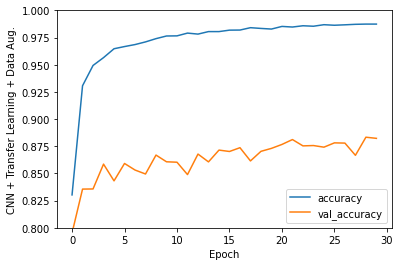

In [ ]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('CNN + Transfer Learning + Data Aug.')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [ ]:
# Saving the weights
!mkdir -p saved_model
TLmodel_aug.save_weights('saved_model/my_model')

In [ ]:
# Downloading the weights
!zip -r /content/weights.zip /content/saved_model
# files.download("/content/weights.zip")

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/checkpoint (deflated 40%)
  adding: content/saved_model/my_model.index (deflated 79%)
  adding: content/saved_model/my_model.data-00000-of-00001 (deflated 12%)


# Classes

In [ ]:
fruits = np.array(['Apple Braeburn',
 'Grape Blue',
 'Pear Monster',
 'Apple Crimson Snow',
 'Grapefruit Pink',
 'Pear Red',
 'Apple Golden 1',
 'Grapefruit White',
 'Pear Stone',
 'Apple Golden 2',
 'Grape Pink',
 'Pear Williams',
 'Apple Golden 3',
 'Grape White',
 'Pepino',
 'Apple Granny Smith',
 'Grape White 2',
 'Pepper Green',
 'Apple Pink Lady',
 'Grape White 3',
 'Pepper Orange',
 'Apple Red 1',
 'Grape White 4',
 'Pepper Red',
 'Apple Red 2',
 'Guava',
 'Pepper Yellow',
 'Apple Red 3',
 'Hazelnut',
 'Physalis',
 'Apple Red Delicious',
 'Huckleberry',
 'Physalis with Husk',
 'Apple Red Yellow 1',
 'Kaki',
 'Pineapple',
 'Apple Red Yellow 2',
 'Kiwi',
 'Pineapple Mini',
 'Apricot',
 'Kohlrabi',
 'Pitahaya Red',
 'Avocado',
 'Kumquats',
 'Plum',
 'Avocado ripe',
 'Lemon',
 'Plum 2',
 'Banana',
 'Lemon Meyer',
 'Plum 3',
 'Banana Lady Finger',
 'Limes',
 'Pomegranate',
 'Banana Red',
 'Lychee',
 'Pomelo Sweetie',
 'Beetroot',
 'Mandarine',
 'Potato Red',
 'Blueberry',
 'Mango',
 'Potato Red Washed',
 'Cactus fruit',
 'Mango Red',
 'Potato Sweet',
 'Cantaloupe 1',
 'Mangostan',
 'Potato White',
 'Cantaloupe 2',
 'Maracuja',
 'Quince',
 'Carambula',
 'Melon Piel de Sapo',
 'Rambutan',
 'Cauliflower',
 'Mulberry',
 'Raspberry',
 'Cherry 1',
 'Nectarine',
 'Redcurrant',
 'Cherry 2',
 'Nectarine Flat',
 'Salak',
 'Cherry Rainier',
 'Nut Forest',
 'Strawberry',
 'Cherry Wax Black',
 'Nut Pecan',
 'Strawberry Wedge',
 'Cherry Wax Red',
 'Onion Red',
 'Tamarillo',
 'Cherry Wax Yellow',
 'Onion Red Peeled',
 'Tangelo',
 'Chestnut',
 'Onion White',
 'Tomato 1',
 'Clementine',
 'Orange',
 'Tomato 2',
 'Cocos',
 'Papaya',
 'Tomato 3',
 'Corn',
 'Passion Fruit',
 'Tomato 4',
 'Corn Husk',
 'Peach',
 'Tomato Cherry Red',
 'Cucumber Ripe',
 'Peach 2',
 'Tomato Heart',
 'Cucumber Ripe 2',
 'Peach Flat',
 'Tomato Maroon',
 'Dates',
 'Pear',
 'Tomato not Ripened',
 'Eggplant',
 'Pear 2',
 'Tomato Yellow',
 'Fig',
 'Pear Abate',
 'Walnut',
 'Ginger Root',
 'Pear Forelle',
 'Watermelon',
 'Granadilla',
 'Pear Kaiser'])

fruits.sort()

# Upload and Classify

In [ ]:
# Upload the file you want to test and put it in my_tests/test
# There can only be one file in the folder at a time
files.upload()

Saving image_2021-03-21_130031.png to image_2021-03-21_130031.png


{'image_2021-03-21_130031.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xe1\x00\x00\x00\xe1\x08\x06\x00\x00\x00>\xb3\xd2z\x00\x00 \x00IDATx\x9c\xec\xbdi\x8c\xa5\xd7y\xe7\xf7;\xdb\xbb\xdc\xadn-\xbd\xb0\x9b\x8bH\x8a\xb2\xa8\x85\xb2vJ\x1a;\x96,\xcf8\xb3\x05I\x1c\xc73v`d&\x83\xc9\x97\x00\x03\xc3I\x90Oq>L\xe6{\x10\x04\x08\x10 AfAf\x02\xd8\x1e\xdbr$\xc7\x8em\x8d\x17I\x14-Q\xb4,\x91l\x8aK\xafU]\xdb\xdd\xde\xedl\xf9p\xee\xad\xaan6)\xd9\xa6\xd4M\xb3\xfe\xc0\xad{\xeb\xae\xef=\xf7\xfc\xdf\xf3\x9cg\xf9?"\xc6\x18y\xdb"\xdcv\xfd\x17\x81~3\x0e\xe4\x14oc\xc8\xbb}\x00w\x17\x7f\xd9\xaf\xff6\x1f\xbeS\xbc)8=\x8d\x03\xa7d:\xc5\xdd\xc4\xe9\xec;\x1a\x82\xbf\xc8\xf5\xe9\xf0\x9d\xe2/\x0f\xf1\xf6\xde\x13\x9e\xe2\x14w\x1f\xa7\xa7\xf2S\x9c\xe2.\xe3\x94\x84\xa78\xc5]\xc6)\tOq\x8a\xbb\x8cS\x12\x02a\x19&l[K]\xb7\x004MG\xdbZ\x00\xba\xce\x1d=\xc7\xb9\xe3\x98b\xdbZb\x8cx\xef\x97\xef\x13\xa8\xaa\xea\xe8\xf1\xd5\xfd\xa78\xc5\x1b\xe1mOB\xef=\xd6&\xe2i-\xc9\xf3\x1c\x80\xa2\xc8\xc8s\x83\xb5\x1e!"R\x1e?\x7f\x85,\xd

In [ ]:
# Uploading the weights
files.upload()

In [ ]:
# Loading the saved weights and creating the model
model = create_model()
!unzip "/content/weights.zip" -d "/content"
model.load_weights('/content/saved_model/my_model')

Archive:  /content/weights.zip
   creating: /content/content/saved_model/
  inflating: /content/content/saved_model/checkpoint  
  inflating: /content/content/saved_model/my_model.index  
  inflating: /content/content/saved_model/my_model.data-00000-of-00001  


In [ ]:
# Loading the image
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_dir = "/content/my_tests"

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 100),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator
nb_samples = len(filenames)

Found 1 images belonging to 2 classes.


In [ ]:
# Finding the probabilities of the classes
prob = TLmodel_aug.predict_generator(test_generator,steps = np.ceil(nb_samples))[0];

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# Finding the top 3 classes
temp = sorted(prob)[::-1]
top3 = []

for j in range(3):
  for i in range(len(fruits)):
      if temp[j] == prob[i] and temp[j] != 0:
        top3.append([fruits[i], prob[i]])
        break
  
for i in top3:
  print(f"{i[0]}: {(i[1]*100).round(2)}%")

Apple Red 2: 6.52%
Apple Red Yellow 2: 5.8%
Corn Husk: 4.51%
